#Walmart Sales Forecast Models
Provide weekly sales forecast by developing the following models:

##ARIMA
##SARIMAX

In [24]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
#!pip install statsmodels

In [26]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [27]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings
from pmdarima.arima import auto_arima
%matplotlib inline

#import module.util_functions as utf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, FactorRange

sns.set()
output_notebook()

warnings.filterwarnings("ignore")
mpl.rcParams['axes.titlesize'] = 17    # font size for plot title
mpl.rcParams['axes.labelsize'] = 14    # font size for x-axis' and y-axis' label

In [28]:
# load data
stores = pd.read_pickle('/content/drive/MyDrive/Final Project/Out1/stores.pkl')
features = pd.read_pickle('/content/drive/MyDrive/Final Project/Out1/features.pkl')
sales = pd.read_pickle('/content/drive/MyDrive/Final Project/Out1/sales.pkl')
store_sales = pd.read_pickle('/content/drive/MyDrive/Final Project/Out1/store_sales.pkl')
weekly_sales = pd.read_pickle('/content/drive/MyDrive/Final Project/Out1/weekly_sales.pkl')

In [29]:
weekly_sales.head()

,Date,IsHoliday,Week,Month,Quarter,Year,Weekly Sales (Million)
0,2010-01-08,False,1,1,1,2010,43.865605
1,2010-01-15,False,2,1,1,2010,41.348378
2,2010-01-22,False,3,1,1,2010,41.367822
3,2010-01-29,False,4,1,1,2010,39.717414
4,2010-02-05,False,5,2,1,2010,49.750740


In [30]:
weekly_sales.index = weekly_sales['Date']
sales = weekly_sales['Weekly Sales (Million)']

In [31]:
weekly_sales.head()

,Date,IsHoliday,Week,Month,Quarter,Year,Weekly Sales (Million)
Date,,,,,,,
2010-01-08,2010-01-08,False,1,1,1,2010,43.865605
2010-01-15,2010-01-15,False,2,1,1,2010,41.348378
2010-01-22,2010-01-22,False,3,1,1,2010,41.367822
2010-01-29,2010-01-29,False,4,1,1,2010,39.717414
2010-02-05,2010-02-05,False,5,2,1,2010,49.750740


In [32]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(sales, period = 12)

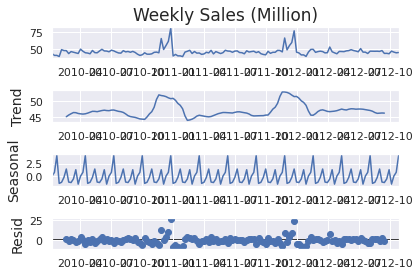

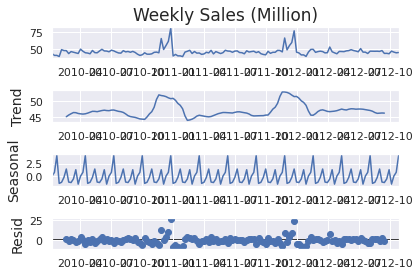

In [33]:
res.plot()

###Seasonality
Residuals plot of general trend model indicates that sales data exhibit seasonality
because there are spikes in sales during and after the weeks of Thanksgiving.

#Stationarity
Checking for Stationarity using Augmented Dickey-Fuller test

Test if timeseries is strongly determined by trend.
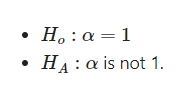

Using significant level of 0.05

 ADF test will return 'p-value' and 'Test Statistics' output values.

p-value > 0.05: non-stationary.
p-value <= 0.05: stationary.
Test statistics: More negative this value more likely we have stationary series. Also, this value should be smaller than critical values(1%, 5%, 10%). For e.g. If test statistic is smaller than the 5% critical values, then we can say with 95% confidence that this is a stationary series

In [34]:
# code obtained from https://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/
def test_stationarity(timeseries, n_lag=52):
    '''
    Plot original time series, n-weeks rolling mean & standard deviation.
    Return Dickey-Fuller test result that indicate whether time series is stationary or not.
    
    Parameter:
    - timeseries: time series data
    '''

    # determine rolling statistics
    rolmean = timeseries.rolling(window=n_lag).mean()
    rolstd = timeseries.rolling(window=n_lag).std()

    # plot rolling statistics:
    fig, ax = plt.subplots(figsize=(14, 4))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best', frameon=False)
    plt.xlabel('Index', size=14)
    plt.ylabel('Weekly Sales (Million USD)')
    plt.title(str(n_lag) + '-Weeks Rolling Mean & Standard Deviation')
    plt.show()
    
    # perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)
    print('\n')
    if dftest[0] < dftest[4]["5%"]:
        print ("Reject Ho - Time Series is Stationary")
    else:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")

Order of differencing:  1


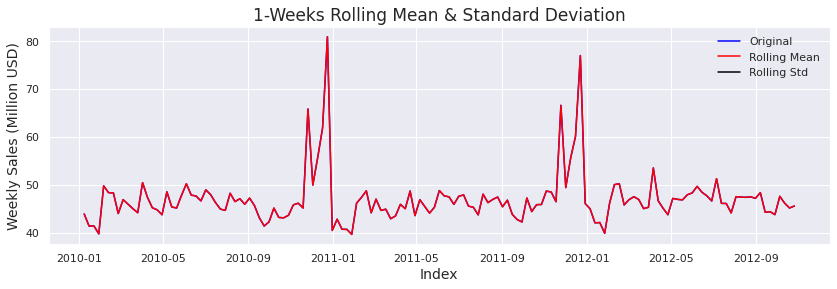

Results of Dickey-Fuller Test:
Test Statistic                -5.977907e+00
p-value                        1.868362e-07
#Lags Used                     4.000000e+00
Number of Observations Used    1.420000e+02
Critical Value (1%)           -3.477262e+00
Critical Value (5%)           -2.882118e+00
Critical Value (10%)          -2.577743e+00
dtype: float64


Reject Ho - Time Series is Stationary



Order of differencing:  5


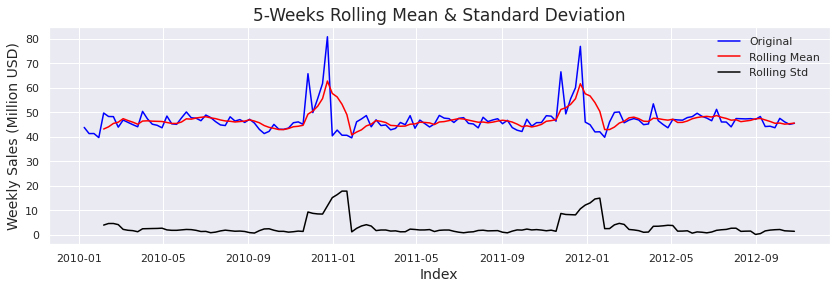

Results of Dickey-Fuller Test:
Test Statistic                -5.977907e+00
p-value                        1.868362e-07
#Lags Used                     4.000000e+00
Number of Observations Used    1.420000e+02
Critical Value (1%)           -3.477262e+00
Critical Value (5%)           -2.882118e+00
Critical Value (10%)          -2.577743e+00
dtype: float64


Reject Ho - Time Series is Stationary



Order of differencing:  39


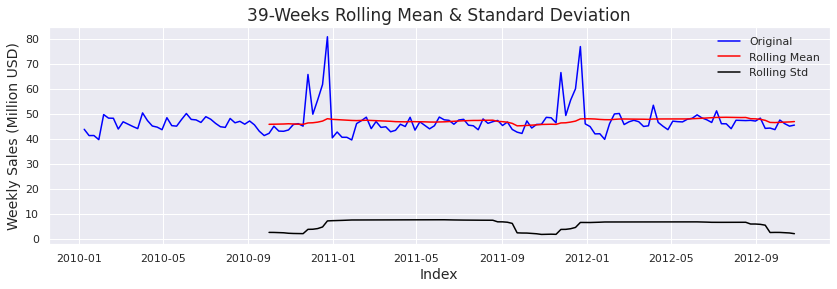

Results of Dickey-Fuller Test:
Test Statistic                -5.977907e+00
p-value                        1.868362e-07
#Lags Used                     4.000000e+00
Number of Observations Used    1.420000e+02
Critical Value (1%)           -3.477262e+00
Critical Value (5%)           -2.882118e+00
Critical Value (10%)          -2.577743e+00
dtype: float64


Reject Ho - Time Series is Stationary



Order of differencing:  47


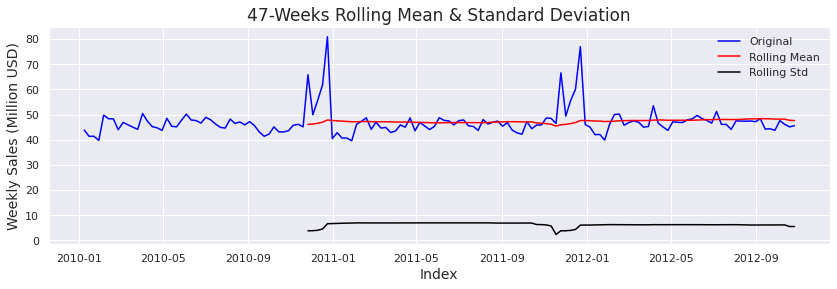

Results of Dickey-Fuller Test:
Test Statistic                -5.977907e+00
p-value                        1.868362e-07
#Lags Used                     4.000000e+00
Number of Observations Used    1.420000e+02
Critical Value (1%)           -3.477262e+00
Critical Value (5%)           -2.882118e+00
Critical Value (10%)          -2.577743e+00
dtype: float64


Reject Ho - Time Series is Stationary





In [35]:
# checking stationarity of following differencing: 1, 5, 39, 47

for i in [1, 5, 39, 47]:
    print('Order of differencing: ', i)
    test_stationarity(weekly_sales['Weekly Sales (Million)'], i)
    print('\n\n')

##Compute metrics for model's evaluation.
    
Parameters:

- forecast: predicted values

- actual: observed values
    
Return a data frame of metrics.


In [36]:
def forecast_accuracy(forecast, actual):
  
    
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # Mean Absolute Percentage Error (MAPE)
    me = np.mean(forecast - actual)                           # Mean Error (ME)
    mae = np.mean(np.abs(forecast - actual))                  # Mean Absolute Error (MAE)
    mpe = np.mean((forecast - actual)/actual)                 # Mean Percentage Error (MPE)
    mse = np.mean((forecast - actual)**2)                     # Mean Squared Error (MSE)
    rmse = np.mean((forecast - actual)**2)**.5                # Root Mean Squared Error (RMSE)
    corr = np.corrcoef(forecast, actual)[0,1]                 # correlation
    
    # compute min-max
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)
    
    return(pd.DataFrame({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'mse': mse, 'rmse':rmse,  
            'corr':corr, 'minmax':minmax}, index=[0]))

#Autoregressive (AR) Terms
An AR(1) autoregressive process is one in which the current value is based on the immediately preceding value, while an AR(2) process is one in which the current value is based on the previous two values, and so on. An AR(0) process is used for white noise and has no dependence between the terms.

A partial autocorrelation (PACF) plot is used to aid in the selection of the order of autoregressive (AR) term.

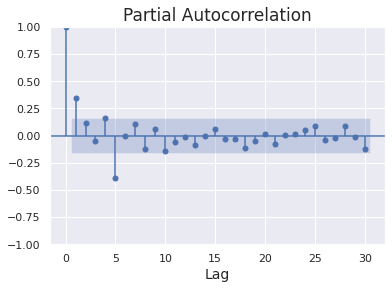

In [37]:
# use PACF plot to figure out the best order of the AR model
sm.graphics.tsa.plot_pacf(sales, lags=30)
plt.xlabel('Lag')
plt.show()

###Insight
The partial autocorrelation plot indicates that lag 1 and 5 are the best orders for AR term

#Moving Average (MA) Term
The estimate of the trend-cycle at time t is obtained by averaging values of the time series within 
 periods k of t:

 
where m=1k+1
.

Observations that are nearby in time are likely to be close in value. Therefore, the average eliminates some of the randomness in the data, leaving a smooth trend-cycle component. We call this an m-MA (___a moving average of order m___).

The order of the moving average determines the smoothness of the trend-cycle estimate. In general, a larger order means a smoother curve.

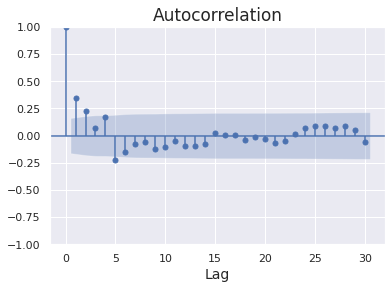

In [38]:
# use ACF plot to figure out the best order of the MA model
sm.graphics.tsa.plot_acf(sales, lags=30)
plt.xlabel('Lag')
plt.show()

###Insight:
The autocorrelation plot indicates that lag 1, 2, and 5 are the best orders for MA term.

#ARIMA Model
   Fit ARIMA model using various orders for AR, Differencing, and MA.
    Select the model that has lowest AIC score.
    Plot the orginal time series and forecast.
    
    Parameters:
    - ar_orders: a list of number of autoregressive terms (AR order)
    - d_orders: a list of number of nonseasonal differences (differencing order)
    - ma_orders: a list of number of moving-average terms (MA order)
    
    Return the model's fit result.

In [39]:
def ArimaModel(ar_orders, d_orders, ma_orders): 
    global sales
    min_aic = 99999                # initialize minimum AIC to a very high number
    best_model = None
    best_p = best_d = best_q = 0   # initialize order for AR, Differencing, and MA to zero
    
    for p in ar_orders:
        for d in d_orders:
            for q in ma_orders:
                model = ARIMA(sales, order=(p, d, q))
                results = model.fit(disp=0)
                aic = results.aic
                
                # select model with lowest AIC score
                if aic < min_aic:
                    min_aic = aic
                    best_model = model
                    best_p = p            # AR order
                    best_d = d            # Differencing order
                    best_q = q            # MA order
    
    # fit the best model
    results = best_model.fit(disp=-1)
    
    # plot observed and forecasted values
    fig, ax = plt.subplots(figsize=(14,5))
    plt.plot(sales, label='Observe')                                # plot original time series
    plt.plot(results.fittedvalues, color='red', label='Forecast')   # plot predictions
    plt.legend(loc='best', frameon=False)
    plt.ylabel('Weekly Sales (Million USD)')
    plt.xlabel('Date')
    plt.title("Walmart's Weekly Sales")
    plt.show()
    
    return results

In [40]:
from statsmodels.tsa.arima_model import ARMA

In [41]:
# since time series is stationary, the order for differencing is 0
model_fit = ArimaModel([1], [0], [1, 2])

NotImplementedError: ignored

###Insight:
Since the time series is stationary, the order for differencing is 0. The below data
shows the model’s summary for ARMA(1, 2). The p-values for the coefficients are all significant
(p-value less than 0.05) for the constant and all AR and MA levels.

In [ ]:
model_fit.summary()

In [ ]:
residuals = pd.DataFrame(model_fit.resid)

# plot standardize residuals
residuals.plot()
plt.title('Standardize Residual')
plt.xlabel('Date')
plt.show()

# plot histogram of residuals
sns.distplot(residuals, kde=True)
plt.title('Histogram of Standardize Residual')
plt.xlabel('Residual')
plt.ylabel('Density')
plt.show()

In [42]:
import pylab 
import scipy.stats as stats

# qq plot to check for normality
stats.probplot(residuals.reset_index()[0], dist="norm", plot=pylab)
pylab.show()

NameError: ignored

###Insight:
The mean of residuals are closed to zero. The residuals are also fluctuated around the
mean. 

It seems that ARMA(1, 2) model is not a good fit because the model does not take
seasonality into account. 

The probability plot shows that the points do not hug the red line closely. 

There are also some extreme values at the top right corner and bottom left corner of
the probability plot.

mape ==>Mean Absolute Percentage Error (MAPE)

me ==> Mean Error (ME)

mae ==> Mean Absolute Error (MAE)

mpe ==> Mean Percentage Error (MPE)

mse ==> Mean Squared Error (MSE)

rmse ==> Root Mean Squared Error (RMSE)

corr ==> correlation

In [43]:
forecast_accuracy(model_fit.fittedvalues, sales)

NameError: ignored

###Insight:
The table above shows performance metrics for ARMA(1, 2) model. The Mean Absolute Percentage Error (MAPE) of 0.055867
indicates that the model is about 94.5% accurate in predicting the next 52 observations.

#ARIMA Model using stepwise

In [44]:
# fit ARIMA model using auto_arima
arima_model = auto_arima(sales, start_p=0, start_q=0,
                         max_p=1, max_q=2,
                         seasonal=False,
                         d=0, trace=True,
                         stepwise=True,
                         error_action='ignore',  
                         suppress_warnings=True)
arima_model.aic()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1552.831, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1395.121, Time=0.29 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=926.070, Time=0.42 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=1.18 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.38 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=902.545, Time=1.29 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=907.251, Time=0.57 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=902.238, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=918.689, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 4.765 seconds


902.2381819977904

In [45]:
arima_model.fit(sales)
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  147
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -448.119
Date:                Sun, 05 Mar 2023   AIC                            902.238
Time:                        14:20:47   BIC                            911.209
Sample:                    01-08-2010   HQIC                           905.883
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     30.8147      2.333     13.208      0.000      26.242      35.387
ar.L1          0.3436      0.038      8.953      0.000       0.268       0.419
sigma2        26.0008      1.546     16.819      0.000      22.971      29.031
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):              1207.86
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               2.23   Skew:                             2.62
Prob(H) (two-sided):                  0.01   Kurtosis:                        16.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

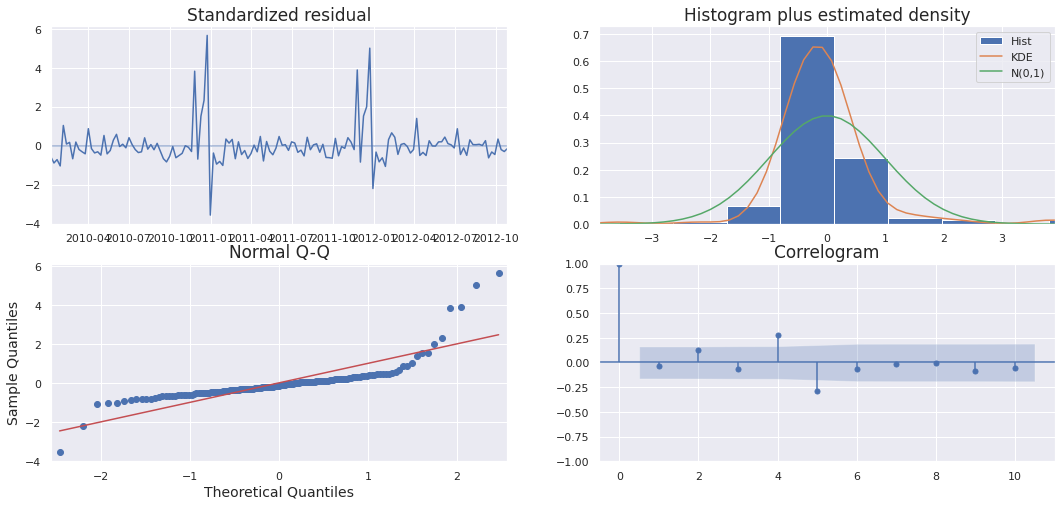

In [46]:
arima_model.plot_diagnostics(figsize=(18, 8))
plt.show()

In [47]:

# get predictions and compute metrics for model's evaluation
forecast_accuracy(arima_model.predict_in_sample(start=0, end=len(sales) - 1), sales)

,mape,me,mae,mpe,mse,rmse,corr,minmax
0,0.056297,-0.007828,2.830347,0.008702,26.008402,5.099843,0.34417,0.05323


#SARIMAX Model

In [48]:
# use auto_arima to select the best model for SARIMAX model
stepwise_model = auto_arima(sales, start_p=0, start_q=0,
                           max_p=1, max_q=2, m=52,
                           start_P=0, seasonal=True,
                           d=0, D=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
stepwise_model.aic()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,1)[52] intercept   : AIC=inf, Time=3.41 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=918.689, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=inf, Time=7.79 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=inf, Time=3.52 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=1552.831, Time=0.03 sec
 ARIMA(0,0,0)(1,0,0)[52] intercept   : AIC=inf, Time=7.29 sec
 ARIMA(0,0,0)(1,0,1)[52] intercept   : AIC=inf, Time=5.75 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=902.238, Time=0.08 sec
 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=inf, Time=3.03 sec
 ARIMA(1,0,0)(1,0,1)[52] intercept   : AIC=inf, Time=9.32 sec
 ARIMA(1,0,1)(0,0,0)[52] intercept   : AIC=902.545, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[52] intercept   : AIC=907.251, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[52]             : AIC=inf, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[52] intercept
Total fit time: 40.776 seconds


902.2381819977904

In [49]:
# fit the model
stepwise_model.fit(sales)

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 52),
      suppress_warnings=True)

In [50]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  147
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -448.119
Date:                Sun, 05 Mar 2023   AIC                            902.238
Time:                        14:21:57   BIC                            911.209
Sample:                    01-08-2010   HQIC                           905.883
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     30.8147      2.333     13.208      0.000      26.242      35.387
ar.L1          0.3436      0.038      8.953      0.000       0.268       0.419
sigma2        26.0008      1.546     16.819      0.000      22.971      29.031
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):              1207.86
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               2.23   Skew:                             2.62
Prob(H) (two-sided):                  0.01   Kurtosis:                        16.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

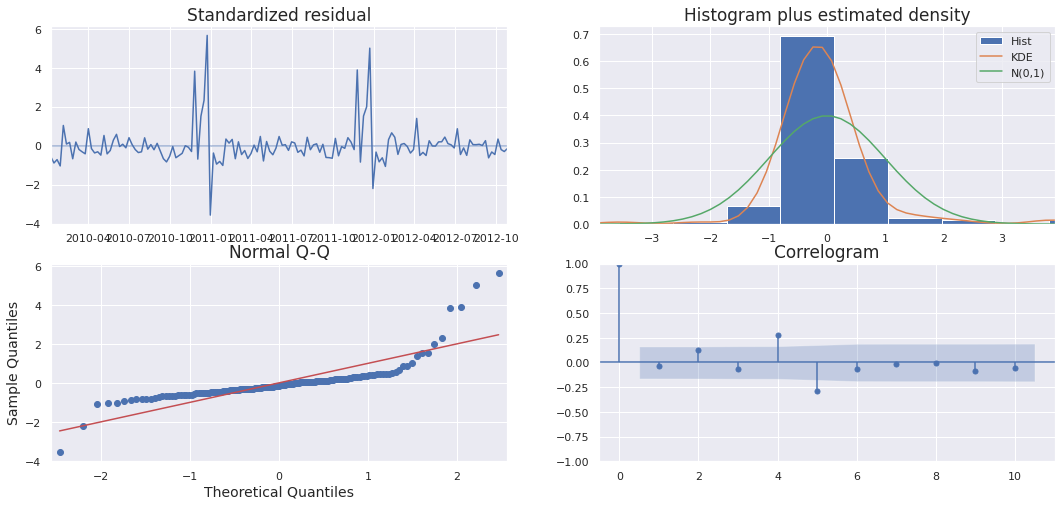

In [51]:
stepwise_model.plot_diagnostics(figsize=(18, 8))
plt.show()

###Insight:
The diagnostic plots above show that the residuals fluctuate around the mean which is
closed to zero. The Normal Q-Q plot shows that there are extreme values in the top right corner
and bottom left corner.

In [52]:
# get predictions and compute metrics for model's evaluation
yhat1 = stepwise_model.predict_in_sample(start=0, end=len(sales)-1)
forecast_accuracy(yhat1, sales)


,mape,me,mae,mpe,mse,rmse,corr,minmax
0,0.056297,-0.007828,2.830347,0.008702,26.008402,5.099843,0.34417,0.05323


##Ploting original time series and forecast

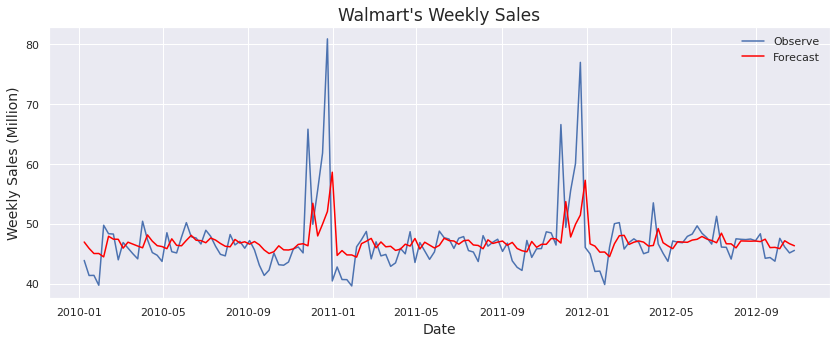

In [54]:

fig, ax = plt.subplots(figsize=(14,5))
predicts = pd.DataFrame(yhat1)
predicts.index = sales.index

plt.plot(sales, label='Observe')
plt.plot(predicts, color='red', label='Forecast')

plt.legend(loc='best', frameon=False)
plt.ylabel('Weekly Sales (Million)')
plt.xlabel('Date')
plt.title("Walmart's Weekly Sales")
plt.show()

In [57]:
yhat1.head()

2010-01-08    46.945791
2010-01-15    45.887408
2010-01-22    45.022464
2010-01-29    45.029145
2010-02-05    44.462048
Freq: W-FRI, Name: predicted_mean, dtype: float64

In [76]:
perdicted=yhat1.head().to_frame().reset_index()
perdicted

,index,predicted_mean
0,2010-01-08,46.945791
1,2010-01-15,45.887408
2,2010-01-22,45.022464
3,2010-01-29,45.029145
4,2010-02-05,44.462048


##Sales Forecast
According to the model’s performance metrics, SARIMAX model performs better than
ARMA model. The SARIMAX model has lower AIC score, lower mean squared error, and lower
mean absolute percentage error than that of ARMA model. Therefore, SARIMAX model is
selected in making sales forecast. The plot below show sales forecast for the next 39 weeks.

#Conclusion

Walmart’s stores are classified into three types: A, B, and C. Type A stores often have
high sales, big store’s sizes, large number of departments, and large markdown values. Type C
stores often have low sales, small store sizes, small number of departments, and small
markdown values. Walmart’s sales are often at peak during the week of Thanksgiving and three
weeks after Thanksgiving. External factors like temperature, fuel price, consumer price index,
and unemployment rate do not have significant impact on Walmart’s sales. Promotional
markdown events before holidays seem to increase Walmart’s sales except for Christmas.